In [6]:
%%capture
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph
%mkdir -p ~/temp
%cd ~/temp

## Enunciado

Considere el proyecto cuya información se adjunta.

In [7]:
pregunta_1 = "1. Dibuje el diagrama Pert y determine el camino crítico.  "
pregunta_2 = "2. Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.  "

In [8]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))

1. Dibuje el diagrama Pert y determine el camino crítico.  

2. Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.  

In [9]:
import pandas as pd
datos_enunciado = pd.DataFrame([
#  actividad, precedentes, b, m, a, coste_duracion_pert, coste_duracion_tope, duracion_tope
     ('A', '---  ',   6,  2.5, 2, 1600, 1800, 2),
     ('B', '---  ',   6,    6, 6, 2800, 2820, 1),
     ('C', '---  ',   1,    1, 1,  600,  600, 1),
     ('D', '---  ',   3,    3, 3,  600,  607, 2),
     ('E', 'A,B  ',  12,    5, 4, 1600, 2200, 2),
     ('F', 'A,B  ',  12,  2.5, 2, 2000, 2200, 1),
     ('G', 'B,C  ',   6, 1.25, 1,  600,  700, 1),
     ('H', 'B,C  ',  20,   15, 10, 3500, 3620, 3),
     ('I', 'D    ',  28,   18, 8, 3500, 3503, 17),
     ('J', 'E,M  ',   4,    4, 4, 1500, 1500, 2),
     ('K', 'F    ',   7,    7, 7, 2000, 2000, 3),
     ('L', 'J,K,G',   1,    1, 1, 1000, 1000, 1),
     ('M', 'F    ',   3,    3, 3,  500,  500, 1),
     ('N', 'J,K,G',   1,    1, 1, 1000, 1000, 1),
     ('P', 'D    ',   3,    3, 3, 1000, 1150, 1),

] ,columns=['actividad', 'precedentes', 'b', 'm', 'a',
            'coste_duracion_pert', 'coste_duracion_tope', 'duracion_tope']).set_index('actividad')

datos_enunciado
tabla = datos_enunciado.copy()
tabla.columns=['precedentes', 'b', 'm', 'a', 
                                        'coste duracion pert', 'coste duracion tope', 'duracion tope']
tabla

,precedentes,b,m,a,coste duracion pert,coste duracion tope,duracion tope
actividad,,,,,,,
A,---,6,2.50,2,1600,1800,2
B,---,6,6.00,6,2800,2820,1
C,---,1,1.00,1,600,600,1
D,---,3,3.00,3,600,607,2
E,"A,B",12,5.00,4,1600,2200,2
F,"A,B",12,2.50,2,2000,2200,1
G,"B,C",6,1.25,1,600,700,1
H,"B,C",20,15.00,10,3500,3620,3
I,D,28,18.00,8,3500,3503,17


{{< pagebreak >}}

## Solución
### Apartado 1

In [10]:
display(Markdown(pregunta_1))

1. Dibuje el diagrama Pert y determine el camino crítico.  

#### Matriz de prelaciones

Empezamos determinando la matriz de prelaciones. Nos sirve para construir el grafo, si leemos las columnas, y para comprobar que no hemos cometido errores, si leemos las columnas.

In [11]:
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_enunciado, activity='actividad', predecessor='precedentes')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,P
activities,,,,,,,,,,,,,,,
A,,,,,,,,,,,,,,,
B,,,,,,,,,,,,,,,
C,,,,,,,,,,,,,,,
D,,,,,,,,,,,,,,,
E,True,True,,,,,,,,,,,,,
F,True,True,,,,,,,,,,,,,
G,,True,True,,,,,,,,,,,,
H,,True,True,,,,,,,,,,,,
I,,,,True,,,,,,,,,,,


{{< pagebreak >}}


### Precálculo de variables de interés

A partir de los datos del enunciado podemos calcular la duración media $D=\frac{a+4m+b}{6}$, y el coste unitario de reducción $\frac{\Delta Coste}{\Delta duración}$ que utilizaremos para contestar las preguntas realizadas.

In [12]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto['duracion'] = datos_proyecto.eval('(b + 4*m +a)/6')
datos_proyecto['cur']      = datos_proyecto.eval('(coste_duracion_tope - coste_duracion_pert)/(duracion - duracion_tope)')
datos_proyecto[['b', 'm', 'a', 'duracion', 'cur']]

,b,m,a,duracion,cur
actividad,,,,,
A,6,2.50,2,3.0,200.000000
B,6,6.00,6,6.0,4.000000
C,1,1.00,1,1.0,NaN
D,3,3.00,3,3.0,7.000000
E,12,5.00,4,6.0,150.000000
F,12,2.50,2,4.0,66.666667
G,6,1.25,1,2.0,100.000000
H,20,15.00,10,15.0,10.000000
I,28,18.00,8,18.0,3.000000


#### Grafo PERT con numeración de nodos

In [13]:
proyecto = prelaciones.create_project()

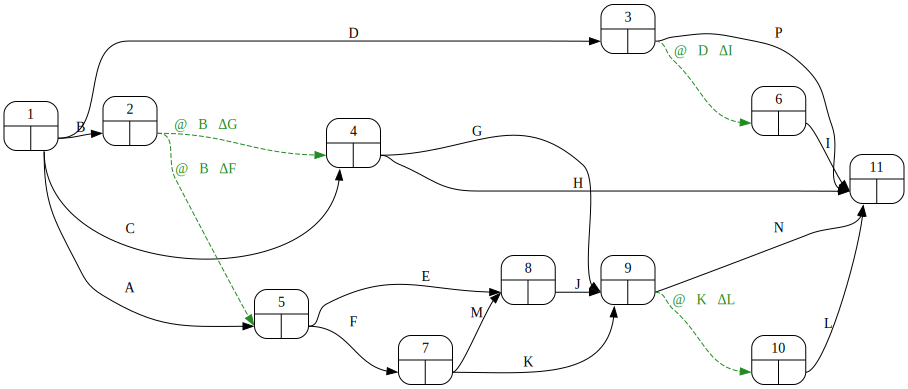

In [14]:
proyecto.pert()

{{< pagebreak >}}
El cuadro de prelaciones distantes nos permite comparar distintas representaciones gráficas del mismo proyecto.

In [15]:
prelaciones_distantes = pd.Series({key: ' '.join(sorted(value)) for key,value in proyecto.distant_predecessor().items()})
prelaciones_distantes = pd.DataFrame(prelaciones_distantes)
prelaciones_distantes.columns=['Precedentes']
prelaciones_distantes

,Precedentes
A,
B,
C,
D,
E,A B
F,A B
G,B C
H,B C
I,D
J,A B E F M


#### Cálculo de tiempos tempranos  y tardíos con el método de Zaderenko

In [16]:
proyecto.zaderenko(durations=datos_proyecto['duracion'])

,1,2,3,4,5,6,7,8,9,10,11,early
1,,6.0,3.0,1.0,3.0,,,,,,,0.0
2,,,,0.0,0.0,,,,,,,6.0
3,,,,,,0.0,,,,,3.0,3.0
4,,,,,,,,,2.0,,15.0,6.0
5,,,,,,,4.0,6.0,,,,6.0
6,,,,,,,,,,,18.0,3.0
7,,,,,,,,3.0,7.0,,,10.0
8,,,,,,,,,4.0,,,13.0
9,,,,,,,,,,0.0,1.0,17.0
10,,,,,,,,,,,1.0,17.0


De manera condensada, se muestran los tiempos tempranos y tardíos en la siguiente tabla:

In [17]:
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto['duracion'])
resultados_pert['nodes']

,early,late
1,0,0
2,6,6
3,3,3
4,6,6
5,6,9
6,3,3
7,10,13
8,13,16
9,17,20
10,17,20


#### Holguras

Calculados los tiempos tempranos y tardíos, podemos calcular las holguras totales de las actividades.

In [18]:
resultados_pert['activities']

,H_total
@∇B⤑ΔF,3
@∇B⤑ΔG,0
@∇D⤑ΔI,0
@∇K⤑ΔL,3
A,6
B,0
C,5
D,0
E,4
F,3


#### Grafo PERT con indicación de tiempos y camino crítico

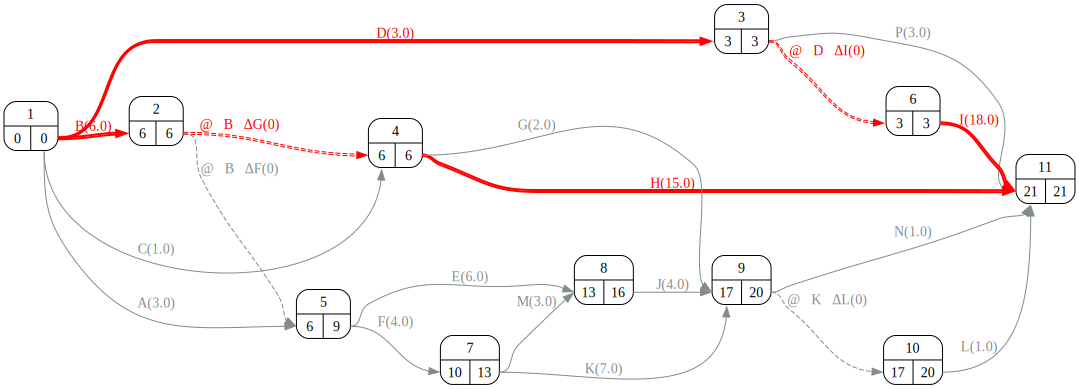

In [19]:
proyecto.pert(durations=datos_proyecto['duracion'])

Las actividades con holgura total igual a cero constituyen el camino crítico. En este caso el camino crítico está formado por las siguientes rutas:

In [20]:
camino_critico = proyecto.critical_path(durations=datos_proyecto['duracion'])
for ruta,actividades in camino_critico.items():
    print(ruta + ":", ", ".join(actividades))
#camino_critico


Route_15: B, H
Route_19: D, I


{{< pagebreak >}}


::: {.landscape}

### Apartado 2.

In [21]:
display(Markdown(pregunta_2))

2. Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.  

Se aborda la solución de este apartado mediante la técnica de reducción de la duración del proyecto con mínimo coste.

In [22]:
#| include: false
#| echo: false
ackoff, best_option, durations, periods_available = proyecto.ackoff(durations=datos_proyecto['duracion'],
                         min_durations=datos_proyecto['duracion_tope'],
                         costs=datos_proyecto['cur']
                        )

Step: 0,	 Critical paths: ['Route_15', 'Route_19']
		 Best option: ['B', 'I'], 	 Cost: 7.0
Step: 1,	 Critical paths: ['Route_15', 'Route_19']
		 Best option: ['B', 'D'], 	 Cost: 11.0
No more paths to reduce.



--------------------------------------------------------------------------------


In [23]:
for item, value in best_option.items():
    print(f"Actividades a recortar en iteración {item}: {value}")

Actividades a recortar en iteración 0: ['B', 'I']
Actividades a recortar en iteración 1: ['B', 'D']


In [24]:
ackoff

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,P,0,1,2
Route_1,200.0,,,,150.0,,,,,0.0,,,,,,14.0,14.0,14.0
Route_2,200.0,,,,150.0,,,,,0.0,,,,,,14.0,14.0,14.0
Route_3,200.0,,,,,66.7,,,,,0.0,,,,,15.0,15.0,15.0
Route_4,200.0,,,,,66.7,,,,,0.0,,,,,15.0,15.0,15.0
Route_5,200.0,,,,,66.7,,,,0.0,,,0.0,,,15.0,15.0,15.0
Route_6,200.0,,,,,66.7,,,,0.0,,,0.0,,,15.0,15.0,15.0
Route_7,,4.0,,,150.0,,,,,0.0,,,,,,17.0,16.0,15.0
Route_8,,4.0,,,150.0,,,,,0.0,,,,,,17.0,16.0,15.0
Route_9,,4.0,,,,66.7,,,,,0.0,,,,,18.0,17.0,16.0
Route_10,,4.0,,,,66.7,,,,,0.0,,,,,18.0,17.0,16.0


La suma del sobrecoste de la primera y segunda iteración es de 18.

#### Proyecto con la duración reducida

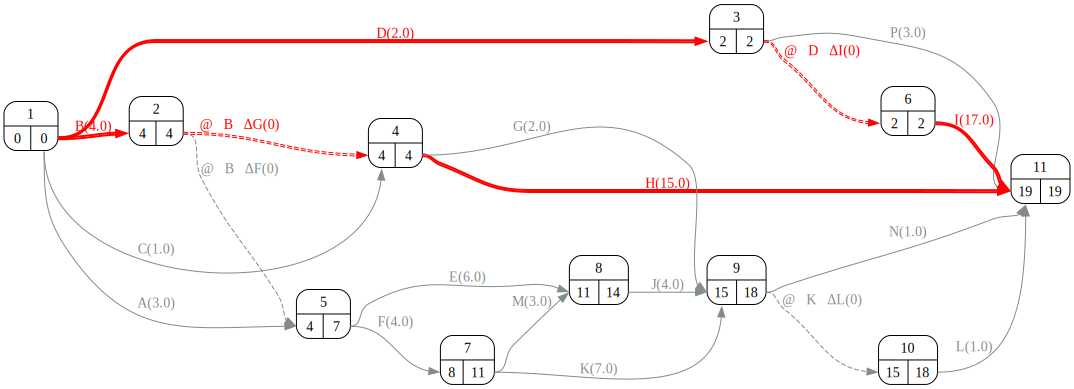

In [25]:
proyecto.pert(durations=durations)

:::